# Refer to the online textbook

[Deep Learning with Python - chapter04_getting-started-with-neural-networks.ipynb](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb)

In [1]:
import csv
import numpy as np
import os
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import tensorflow.keras.datasets
import time

from matplotlib import pyplot as plt
from tensorflow import keras

if not os.path.isdir('HW1_2'):
    os.mkdir('HW1_2')

In [2]:
def write_to_csv(data):
    file_path = os.path.join('HW1_2', 'Model_performance.csv')
    file_exists = os.path.isfile(file_path)

    with open(file_path, 'a+', newline='') as csvfile:
        writer = csv.writer(csvfile)
        if not file_exists:
            writer.writerow(['Model_Desc', 'Test_MAE', 'Train_MAE', 'Test_MAPE', 'Train_MAPE', 'Test_RMSE', 'Train_RMSE'])
        writer.writerow(data)

In [3]:
# Load the Boston Housing dataset
(train_x, train_y), (test_x, test_y) = tensorflow.keras.datasets.boston_housing.load_data()

# Get the shape of the data
print(f'train_x: {train_x.shape}, test_y:{train_y.shape}\ntest_x: {test_x.shape}, test_y: {test_y.shape}')
print('==========\ntrain_x: 404筆13特徵的資料, test_y: 404筆目標值')

train_x: (404, 13), test_y:(404,)
test_x: (102, 13), test_y: (102,)
train_x: 404筆13特徵的資料, test_y: 404筆目標值


## Data processing

Z-score normalization  
將原始資料集調整為平均為0，標準差為1的新資料集

$$z = (x - μ) / σ$$

x: 資料  
μ: 平均  
σ: 標準差

參考資料: [[改善資料品質]Part-3 正規化與標準化資料_Z-score normalization](https://ithelp.ithome.com.tw/articles/10202059)

In [4]:
scale = sklearn.preprocessing.StandardScaler()
train_x_n = scale.fit_transform(train_x)
test_x_n = scale.transform(test_x)

'''
train_x_mean = train_x.mean(axis=0)
train_x_n = train_x - train_x_mean
test_x_n = test_x - train_x_mean

std = train_x_n.std(axis=0)

train_x_n /= std
test_x_n /= std
'''

'\ntrain_x_mean = train_x.mean(axis=0)\ntrain_x_n = train_x - train_x_mean\ntest_x_n = test_x - train_x_mean\n\nstd = train_x_n.std(axis=0)\n\ntrain_x_n /= std\ntest_x_n /= std\n'

## Create Model

隱藏層數量: 2  
節點數量: 每層64個  
積活函數: 隱藏層使用`relu`，輸出曾因為是線性回歸，不選擇  
最佳化器: `rmsprop`  
損失函數: `mse`  
batch_size: 16  
epochs: 80次

In [5]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training

In [7]:

train_history = model.fit(train_x_n, train_y, epochs=80, batch_size=16)

Epoch 1/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 545.1113 - mae: 21.4806 
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 379.9902 - mae: 17.6408 
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 228.3439 - mae: 12.3836 
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 106.3703 - mae: 7.6613  
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.2019 - mae: 5.5171 
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.7142 - mae: 4.5592 
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.7796 - mae: 4.0115 
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.9880 - mae: 3.8637 
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4118 - mae: 3.1668 
Epoch 10/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0400 - mae: 3.0589 
Epoch 11/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3243 - mae: 2.8946 
Epoch 12/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.4395 - mae: 2.6349
Epoch 13/80
26/26 

## Model inference results

In [8]:
predictions = model.predict(test_x_n[:10])

print(f'predictions[0]: {predictions[0][0]}')
print(f'test_y[0]: {test_y[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
predictions[0]: 9.351825714111328
test_y[0]: 7.2


## Performance validation

參考資料: [评价指标RMSE、MSE、MAE、MAPE、SMAPE 、R-Squared——python+sklearn实现](https://blog.csdn.net/qq_41870157/article/details/104699118)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test data set:
MAE: 2.7387669993381873, MAPE: 0.15438218902886633, RMSE: 4.393163190275439
Train data set:
MAE: 1.899752671883838, MAPE: 0.10060002126722499, RMSE: 2.5402084788229575


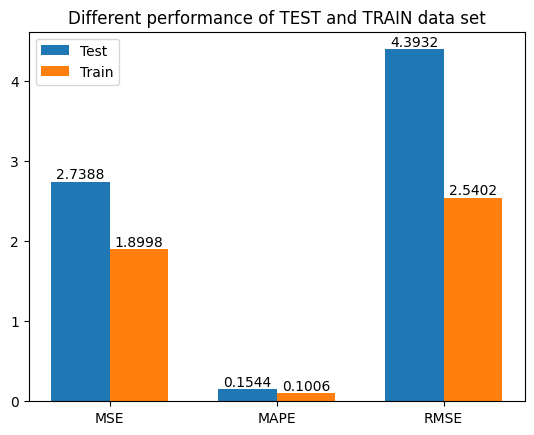

In [9]:
# Get MAE, MAPE and RMSE by sklearn.metrics
test_predictions = model.predict(test_x_n)
test_mae = sklearn.metrics.mean_absolute_error(test_y, test_predictions)
test_mape = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions)
test_rmse = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions))

test_predictions = model.predict(train_x_n)
train_mae = sklearn.metrics.mean_absolute_error(train_y, test_predictions)
train_mape = sklearn.metrics.mean_absolute_percentage_error(train_y, test_predictions)
train_rmse = np.sqrt(sklearn.metrics.mean_squared_error(train_y, test_predictions))

write_to_csv(['Basic', test_mae, train_mae, test_mape, train_mape, test_rmse, train_rmse])

print('Test data set:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Train data set:')
print(f'MAE: {train_mae}, MAPE: {train_mape}, RMSE: {train_rmse}')

# Bar chart
x = range(3)
bar_width = 0.35
test_bars= plt.bar(x, [test_mae, test_mape, test_rmse], bar_width, label='Test')
train_bars = plt.bar([i + bar_width for i in x], [train_mae, train_mape, train_rmse], bar_width, label='Train')
plt.xticks([i + bar_width / 2 for i in x], ['MSE', 'MAPE', 'RMSE'])
plt.bar_label(train_bars, fmt='%.4f')
plt.bar_label(test_bars, fmt='%.4f')
plt.title('Different performance of TEST and TRAIN data set')
plt.legend()
plt.show()

In [10]:
df = pd.DataFrame.from_dict({'Test': [test_mae, test_mape, test_rmse], 'Train': [train_mae, train_mape, train_rmse]})
df.index = ['MAE', 'MAPE', 'RMSE']
df.to_csv(os.path.join('HW1_2', 'Test_Train_performance.csv'))
df

,Test,Train
MAE,2.738767,1.899753
MAPE,0.154382,0.100600
RMSE,4.393163,2.540208


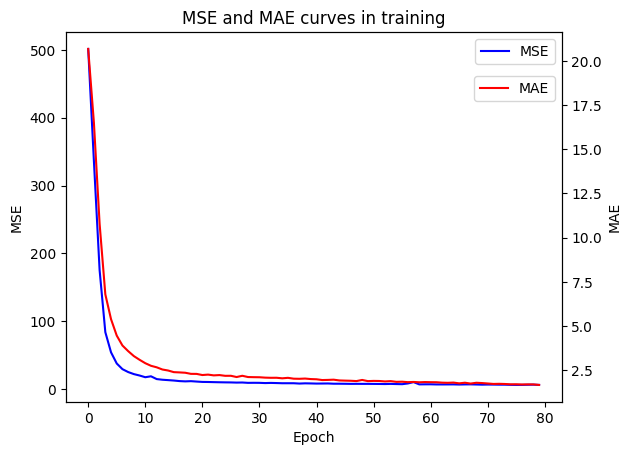

In [11]:
# Write accuracy and loss curves

fig, ax_a = plt.subplots()
ax_l = ax_a.twinx()

ax_a.plot(train_history.history['loss'], 'b-', label='MSE')
ax_a.set_xlabel('Epoch')
ax_a.set_ylabel('MSE')

ax_l.plot(train_history.history['mae'], 'r-', label='MAE')
ax_l.set_ylabel('MAE')

ax_a.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
ax_l.legend(loc='best', bbox_to_anchor=(1.0, 0.9))

plt.title('MSE and MAE curves in training')

plt.show()

In [12]:
df = pd.DataFrame.from_dict({'MSE': train_history.history['loss'], 'MAE': train_history.history['mae']})
df.to_csv(os.path.join('HW1_2', 'MSE_MAE_curves.csv'))
df

,MSE,MAE
0,501.584137,20.676830
1,335.961761,16.504103
2,175.065918,10.781081
3,83.620850,6.796600
4,53.835423,5.391224
...,...,...
75,5.742872,1.709118
76,5.789550,1.696851
77,5.987391,1.703108
78,6.139844,1.700150


# Impact of Data Normalization (a)

In [13]:
model_a = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model_a.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['mae']
)

train_history_a = model_a.fit(train_x, train_y, epochs=80, batch_size=16)

Epoch 1/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 900.1299 - mae: 18.1838 
Epoch 2/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.8648 - mae: 8.4982  
Epoch 3/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.6977 - mae: 8.5867
Epoch 4/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181.2307 - mae: 10.0274
Epoch 5/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.8032 - mae: 7.5857  
Epoch 6/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 79.3635 - mae: 6.7815 
Epoch 7/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.6879 - mae: 6.3653 
Epoch 8/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.3801 - mae: 7.0436 
Epoch 9/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.0257 - mae: 6.5446 
Epoch 10/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.9808 - mae: 7.5383  
Epoch 11/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.7295 - mae: 7.6035  
Epoch 12/80
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.2257 - mae: 8.0021  
Epoch 13/80


In [14]:
test_predictions_a = model.predict(test_x)
train_predictions_a = model.predict(train_x)
test_mae_a = sklearn.metrics.mean_absolute_error(test_y, test_predictions_a)
test_mape_a = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_a)
test_rmse_a = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_a))
train_mae_a = sklearn.metrics.mean_absolute_error(train_y, train_predictions_a)
train_mape_a = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_a)
train_rmse_a = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_a))

# write_to_csv(['Without Normalization', test_mae_a, train_mae_a, test_mape_a, train_mape_a, test_rmse_a, train_rmse_a])

print('With Normalization:')
print(f'MAE: {test_mae}, MAPE: {test_mape}, RMSE: {test_rmse}')
print('Without Normalizatio:')
print(f'MAE: {train_mae_a}, MAPE: {train_mape_a}, RMSE: {train_rmse_a}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
With Normalization:
MAE: 2.7387669993381873, MAPE: 0.15438218902886633, RMSE: 4.393163190275439
Without Normalizatio:
MAE: 2754.03590039546, MAPE: 148.9777833033695, RMSE: 2794.5411522689874


In [15]:
df = pd.DataFrame.from_dict(
    {'with normalizaion': train_history.history['loss'],
     'without normalizaion': train_history_a.history['loss']}
    )
df.to_csv(os.path.join('HW1_2', 'MSE_with_without_normalization.csv'))
df

,with normalizaion,without normalizaion
0,501.584137,308.477020
1,335.961761,101.318069
2,175.065918,96.997017
3,83.620850,116.716187
4,53.835423,90.602707
...,...,...
75,5.742872,28.147591
76,5.789550,29.013569
77,5.987391,29.639545
78,6.139844,26.758579


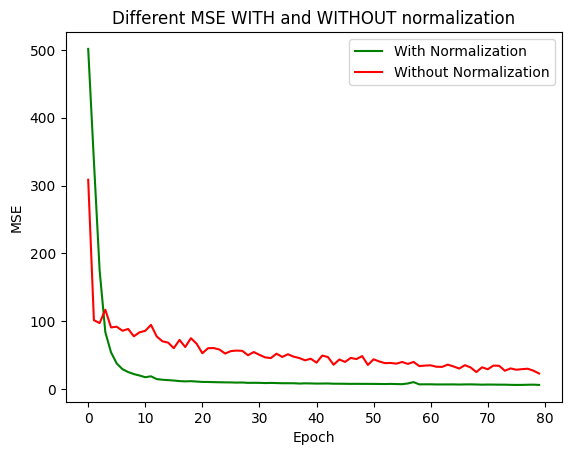

In [16]:
# Write accuracy and loss curves

plt.plot(train_history.history['loss'], 'g-', label='With Normalization',)
plt.plot(train_history_a.history['loss'], 'r-', label='Without Normalization')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='best')

plt.title('Different MSE WITH and WITHOUT normalization')

plt.show()

### 資料是否做正規化處理(z-score)的差別：
資料做正規化處理後，收斂數度更快，並且減少跳躍的情況

# Hidden layer unit number (b)

In [17]:
result_unit_num = []
result_mae = []

for i in range(16):
    unit_num = 16*(i+1)
    model_b = keras.Sequential([
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(unit_num, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_b.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {unit_num} units...', end='\r')
    train_history_b = model_b.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_b = model_b.predict(test_x_n)
    train_predictions_b = model_b.predict(train_x_n)
    test_mae_b = sklearn.metrics.mean_absolute_error(test_y, test_predictions_b)
    test_mape_b = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_b)
    test_rmse_b = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_b))
    train_mae_b = sklearn.metrics.mean_absolute_error(train_y, train_predictions_b)
    train_mape_b = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_b)
    train_rmse_b = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_b))
    write_to_csv([f'Unit_{unit_num}', test_mae_b, train_mae_b, test_mape_b, train_mape_b, test_rmse_b, train_rmse_b])

    result_unit_num.append(unit_num)
    result_mae.append(test_mae_b)
    print(f'Model with {unit_num} units\'s MAE: {test_mae_b}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 16 units's MAE: 3.058721599391862
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 32 units's MAE: 2.848993061103073
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model with 48 units's MAE: 2.8008844740250534
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 64 units's MAE: 2.701093147315231
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model with 80 units's MAE: 2.538962266959396
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model with 96 units's MAE: 2.6495596137701294
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 112 units's MAE: 2.710847074845258
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 128 units's MAE: 2.480747340707218
4/4 ━━━━━━━━

In [18]:
df = pd.DataFrame(result_mae, index=result_unit_num, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_units.csv'))
df

,MAE
16,3.058722
32,2.848993
48,2.800884
64,2.701093
80,2.538962
96,2.649560
112,2.710847
128,2.480747
144,2.699117
160,2.635213


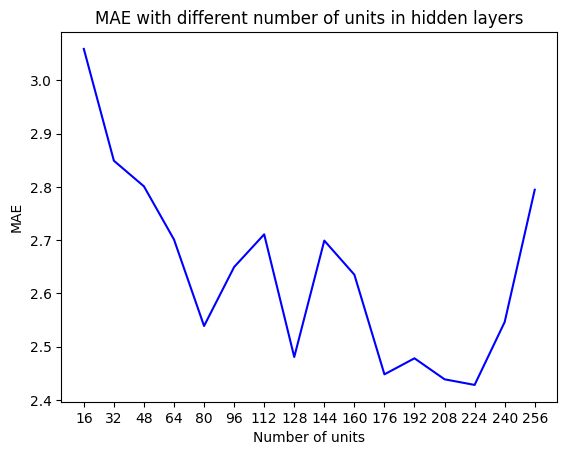

In [19]:
plt.plot(result_unit_num, result_mae, 'b-')
plt.xlabel('Number of units')
plt.ylabel('MAE')
plt.xticks(result_unit_num)
plt.title('MAE with different number of units in hidden layers')
plt.show()

### 隱藏層節點數量對模型的影響:
雖然沒有太大差異，但120到160之間是比較建議的節點數量

# Activation function (c)

LeakyReLU 參考資料: [Data Science - How to use LeakyRelu as activation function in sequence DNN in keras?When it perfoms better than Relu?](https://datascience.stackexchange.com/questions/39042/how-to-use-leakyrelu-as-activation-function-in-sequence-dnn-in-keraswhen-it-per)

In [20]:
activation_functions = ['linear', 'relu', 'leakyreLU', 'sigmoid', 'tanh', 'gelu', 'softplus', 'mish', 'swish']
result_mae = []

for activation_function in activation_functions:
    if activation_function == 'leakyreLU':
        act = keras.layers.LeakyReLU(alpha=0.03)
    else:
        act = activation_function
    model_c = keras.Sequential([
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(64, activation=act),
        keras.layers.Dense(1)
    ])
    model_c.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {activation_function} activation function...', end='\r')
    train_history_c = model_c.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_c = model_c.predict(test_x_n)
    train_predictions_c = model_c.predict(train_x_n)
    test_mae_c = sklearn.metrics.mean_absolute_error(test_y, test_predictions_c)
    test_mape_c = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_c)
    test_rmse_c = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_c))
    train_mae_c = sklearn.metrics.mean_absolute_error(train_y, train_predictions_c)
    train_mape_c = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_c)
    train_rmse_c = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_c))
    write_to_csv([f'Act_fn_{activation_function}', test_mae_c, train_mae_c, test_mape_c, train_mape_c, test_rmse_c, train_rmse_c])
    result_mae.append(test_mae_c)
    print(f'Model with {activation_function} activation function\'s MAE: {test_mae_c}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with linear activation function's MAE: 3.4163706787661017
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with relu activation function's MAE: 2.7452976899988513


d:\Users\Jason\Downloads\機器學習(3313)\hw1_M11223045\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with leakyreLU activation function's MAE: 2.7061053182564527
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with sigmoid activation function's MAE: 3.299499040491441
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with tanh activation function's MAE: 2.3922385159660786
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with gelu activation function's MAE: 2.4215246097714296
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with softplus activation function's MAE: 3.2976542360642376
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with mish activation function's MAE: 2.4711483721639596
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with swish activation function's MAE: 2.636014679366467


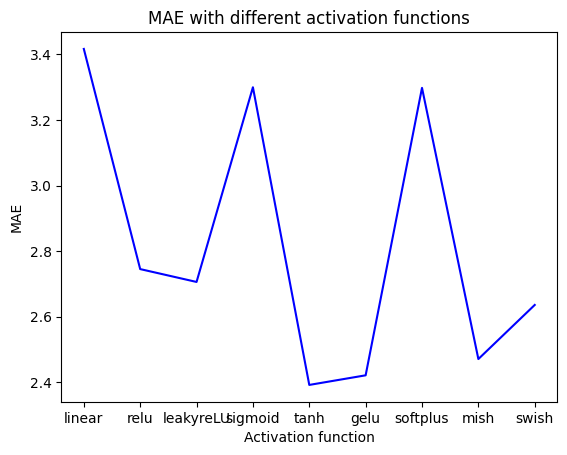

In [21]:
plt.plot(activation_functions, result_mae, 'b-')
plt.xlabel('Activation function')
plt.ylabel('MAE')
plt.xticks(activation_functions)
plt.title('MAE with different activation functions')
plt.show()

In [22]:
df = pd.DataFrame(result_mae, index=activation_functions, columns=['MAE'])
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_activation_functions.csv'))
df

,MAE
linear,3.416371
relu,2.745298
leakyreLU,2.706105
sigmoid,3.299499
tanh,2.392239
gelu,2.421525
softplus,3.297654
mish,2.471148
swish,2.636015


### 隱藏層激活函數 (Activation Functions) 的選擇對模型的影響
激活函數在這次實驗表現最好的是`mish`，是`relu`的變體。

# Optimizer (d)

With momentum資料來源  
SGD: [Keras - SGD](https://keras.io/api/optimizers/sgd/)  
RMSprop: [RMSprop - SGD](https://keras.io/api/optimizers/rmsprop/)

In [26]:
optimizers = ['sgd', 'sgd wm', 'adagrad', 'rmsprop', 'rmsprop wm','adam']
result_mae = []

for optimizer in optimizers:
    model_d = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    if optimizer == 'sgd wm':
        opt = keras.optimizers.SGD(momentum=0.5)
    elif optimizer == 'rmsprop wm':
        opt = keras.optimizers.RMSprop(momentum=0.5)
    else:
        opt = optimizer
    model_d.compile(
        optimizer=opt,
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {optimizer} optimizer...', end='\r')
    train_history_d = model_d.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    test_predictions_d = model_d.predict(test_x_n)
    train_predictions_d = model_d.predict(train_x_n)
    test_mae_d = sklearn.metrics.mean_absolute_error(test_y, test_predictions_d)
    test_mape_d = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_d)
    test_rmse_d = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_d))
    train_mae_d = sklearn.metrics.mean_absolute_error(train_y, train_predictions_d)
    train_mape_d = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_d)
    train_rmse_d = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_d))
    write_to_csv([f'opt_{optimizer}', test_mae_d, train_mae_d, test_mape_d, train_mape_d, test_rmse_d, train_rmse_d])
    result_mae.append(test_mae_d)
    print(f'Model with {optimizer} optimizer\'s MAE: {test_mae_d}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with sgd optimizer's MAE: 2.636126702439551
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with sgd wm optimizer's MAE: 3.8429375816794002
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with adagrad optimizer's MAE: 9.063653185788324
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with rmsprop optimizer's MAE: 2.79803134132834
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with rmsprop wm optimizer's MAE: 2.5161006946189737
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with adam optimizer's MAE: 2.6710504457062365


In [27]:
df = pd.DataFrame.from_dict({'Optimizer': optimizers, 'MAE': result_mae})
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_optimizers.csv'))
df

,Optimizer,MAE
0,sgd,2.636127
1,sgd wm,3.842938
2,adagrad,9.063653
3,rmsprop,2.798031
4,rmsprop wm,2.516101
5,adam,2.671050


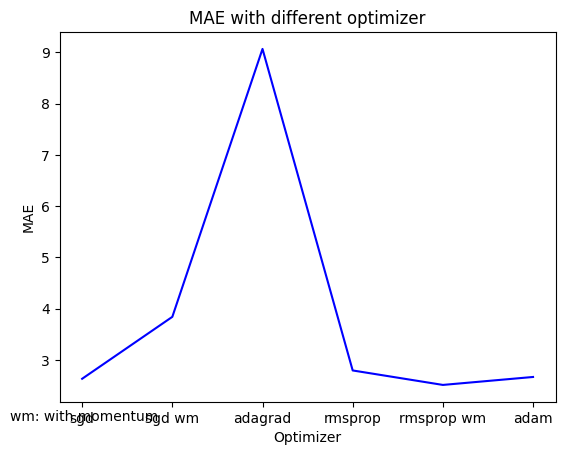

In [28]:
plt.plot(optimizers, result_mae, 'b-')
plt.xlabel('Optimizer')
plt.ylabel('MAE')
plt.xticks(optimizers)
plt.title('MAE with different optimizer')
plt.text(-0.8, 1.82, 'wm: with momentum')
plt.show()

本實驗表現最好的是有Monentum的`RMSprop`，常用的`Adam`也有不錯的表現

# Epoch (e)

In [29]:
result_epochs_num = []
result_test_mae = []
result_train_mae = []
result_times = []

for i in range(10):
    model_e = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_e.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    epochs = 100 * (i+1)
    print(f'Training model with {epochs} epochs...', end='\r')
    st = time.perf_counter()
    train_history_e = model_e.fit(train_x_n, train_y, epochs=epochs, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_e = model_e.predict(test_x_n)
    train_predictions_e = model_e.predict(train_x_n)
    test_mae_e = sklearn.metrics.mean_absolute_error(test_y, test_predictions_e)
    test_mape_e = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_e)
    test_rmse_e = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_e))
    train_mae_e = sklearn.metrics.mean_absolute_error(train_y, train_predictions_e)
    train_mape_e = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_e)
    train_rmse_e = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_e))
    result_test_mae_e = test_mae_e
    result_train_mae_e = train_mae_e
    result_epochs_num.append(epochs)
    result_test_mae.append(result_test_mae_e)
    result_train_mae.append(result_train_mae_e)
    result_times.append(et - st)
    write_to_csv([f'Epoch_{epochs}', test_mae_e, train_mae_e, test_mape_e, train_mape_e, test_rmse_e, train_rmse_e])
    print(f'Model with {epochs} epochs\'s MAE: {result_test_mae_e} in {et - st} seconds')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 100 epochs's MAE: 2.455814464419496 in 9.640759900008561 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 200 epochs's MAE: 2.397523038527545 in 19.858814299994265 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 300 epochs's MAE: 2.319757885091445 in 23.95611050000298 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 400 epochs's MAE: 2.600408165127624 in 31.985634900003788 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 500 epochs's MAE: 2.266100498274261 in 39.9152585999982 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 600 epochs's MAE: 2.3217613706401754 in 47.936770999993314 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [30]:
df = pd.DataFrame.from_dict({'Test': result_test_mae, 'Train': result_train_mae, 'Time':result_times})
df.index = result_epochs_num
df.to_csv(os.path.join('HW1_2', 'MAE_with_different_epochs.csv'))
df

,Test,Train,Time
100,2.455814,1.525307,9.640760
200,2.397523,1.323739,19.858814
300,2.319758,0.927675,23.956111
400,2.600408,0.853458,31.985635
500,2.266100,0.750386,39.915259
600,2.321761,0.529955,47.936771
700,2.682024,0.715863,56.740875
800,2.499756,0.521650,63.240891
900,2.631680,0.649917,78.818385
1000,2.828175,0.573320,85.896633


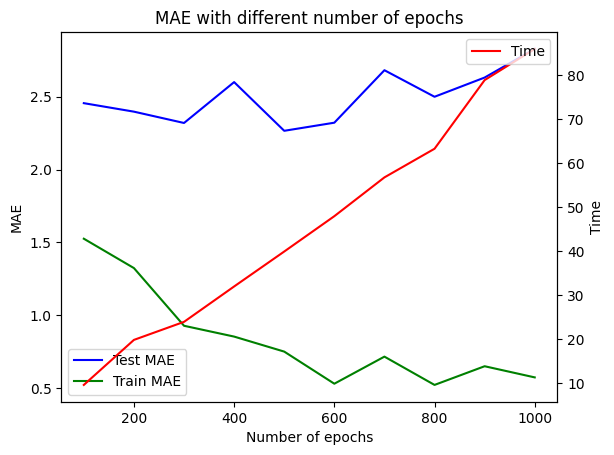

In [31]:
fig, ax_mae = plt.subplots()
ax_time = ax_mae.twinx()

ax_mae.plot(result_epochs_num, result_test_mae, 'b-', label='Test MAE')
ax_mae.plot(result_epochs_num, result_train_mae, 'g-', label='Train MAE')
ax_mae.set_xlabel('Number of epochs')
ax_mae.set_ylabel('MAE')
ax_mae.set_title('MAE with different number of epochs')
ax_mae.legend(loc='lower left')

ax_time.plot(result_epochs_num, result_times, 'r-', label='Time')
ax_time.set_ylabel('Time')
ax_time.legend(loc='upper right')
plt.show()

Epochs在到300以後，雖然Train資料集的MAE還有持續下降，但Test資料集下降的幅度已經很小了
建議的Epochs在300~400之間

# Batch size (f)

In [32]:
result_batch_num = []
result_train_history = []

for i in range(5):
    model_f = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    model_f.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )

    batch_size = 8 * (i+1)
    print(f'Training model with {batch_size} batch size...', end='\r')
    train_history_f = model_f.fit(train_x_n, train_y, epochs=80, batch_size=batch_size, verbose=0)
    test_predictions_f = model_f.predict(test_x_n)
    train_predictions_f = model_f.predict(train_x_n)
    test_mae_f = sklearn.metrics.mean_absolute_error(test_y, test_predictions_f)
    test_mape_f = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_f)
    test_rmse_f = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_f))
    train_mae_f = sklearn.metrics.mean_absolute_error(train_y, train_predictions_f)
    train_mape_f = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_f)
    train_rmse_f = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_f))
    write_to_csv([f'Batch_{batch_size}', test_mae_f, train_mae_f, test_mape_f, train_mape_f, test_rmse_f, train_rmse_f])
    result_batch_num.append(batch_size)
    result_train_history.append(train_history_f.history['loss'])
    print(f'Model with {batch_size} batch size\'s MAE: {train_history_f.history['mae'][-1]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 8 batch size's MAE: 1.5571445226669312
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 16 batch size's MAE: 1.702686071395874
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 24 batch size's MAE: 1.7414071559906006
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 32 batch size's MAE: 1.8543164730072021
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 40 batch size's MAE: 1.908826470375061


In [33]:
df = pd.DataFrame.from_dict({'16': result_train_history[0], '32': result_train_history[1], '48': result_train_history[2], '64': result_train_history[3], '80': result_train_history[4]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_batch_size.csv'))
df

,16,32,48,64,80
0,429.643494,470.843567,513.451965,528.830444,536.223511
1,149.462936,278.191528,379.768860,419.590942,457.105286
2,47.215652,131.774323,242.804855,308.172028,361.828857
3,28.629120,62.720284,131.919571,202.887634,282.470703
4,22.948008,40.335911,72.784615,123.816544,193.667984
...,...,...,...,...,...
75,5.141356,5.882286,6.080971,7.083951,7.158128
76,5.050274,5.938635,6.071250,7.304516,7.012680
77,5.058945,5.938371,5.896965,7.349872,7.449303
78,4.864311,6.109280,5.969523,7.044187,7.091698


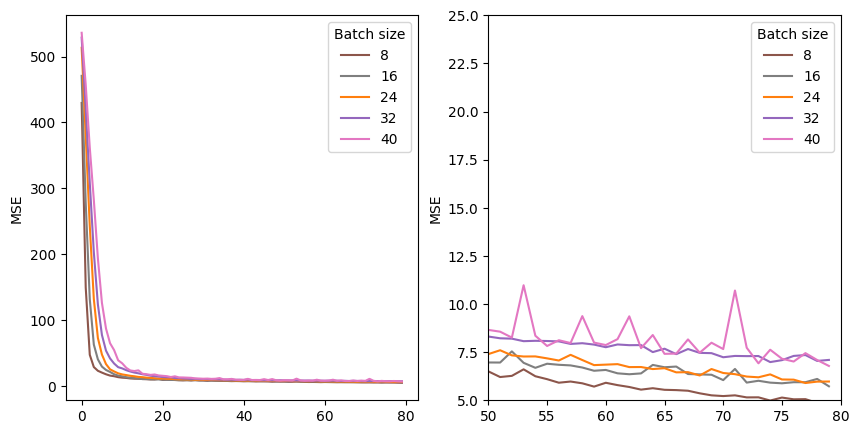

In [34]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(10, 5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
random_colors = np.random.choice(colors, size=5, replace=False)

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_1.plot(line, color=color, label=batch_size)
ax_1.legend(title='Batch size')
ax_1.set_ylabel('MSE')

for line, color, batch_size in zip(result_train_history, random_colors, result_batch_num):
    ax_2.plot(line, color=color, label=batch_size)
ax_2.set_ylim(5, 25)
ax_2.set_xlim(50, 80)
ax_2.legend(title='Batch size')
ax_2.set_ylabel('MSE')

plt.show()

本實驗結果batch=8的模型在收斂速度比較快，並在最後面的MSE也是相對較低的。  
較高的Batch size反而更不穩定。

# Number of Hidden layer (g)

In [35]:
result_train_history = []
result_times = []
result_params_num = []

for i in range(10):
    model_g = keras.Sequential()
    for j in range(i):
        model_g.add(keras.layers.Dense(32, activation='relu'))
    model_g.add(keras.layers.Dense(1))
    model_g.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae'],
    )
    print(f'Training model with {i+1} hidden layer...', end='\r')
    st = time.perf_counter()
    train_history_g = model_g.fit(train_x_n, train_y, epochs=80, batch_size=16, verbose=0)
    et = time.perf_counter()
    test_predictions_g = model_g.predict(test_x_n)
    train_predictions_g = model_g.predict(train_x_n)
    test_mae_g = sklearn.metrics.mean_absolute_error(test_y, test_predictions_g)
    test_mape_g = sklearn.metrics.mean_absolute_percentage_error(test_y, test_predictions_g)
    test_rmse_g = np.sqrt(sklearn.metrics.mean_squared_error(test_y, test_predictions_g))
    train_mae_g = sklearn.metrics.mean_absolute_error(train_y, train_predictions_g)
    train_mape_g = sklearn.metrics.mean_absolute_percentage_error(train_y, train_predictions_g)
    train_rmse_g = np.sqrt(sklearn.metrics.mean_squared_error(train_y, train_predictions_g))
    write_to_csv([f'Layer_{i+1}_Unit_32', test_mae_g, train_mae_g, test_mape_g, train_mape_g, test_rmse_g, train_rmse_g])
    result_train_history.append(train_history_g.history['loss'])
    result_times.append(et - st)
    result_params_num.append(model_g.count_params())
    print(f'Model with {i+1} hidden layer\'s MSE: {train_history_g.history['loss'][-1]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 1 hidden layer's MSE: 453.7865905761719
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 2 hidden layer's MSE: 11.519601821899414
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 3 hidden layer's MSE: 7.547074317932129
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model with 4 hidden layer's MSE: 5.358401298522949
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 5 hidden layer's MSE: 5.032160758972168
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 6 hidden layer's MSE: 4.062055587768555
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Model with 7 hidden layer's MSE: 3.997051477432251
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model with 8 hidde

In [36]:
df = pd.DataFrame.from_dict({
    '1': result_train_history[0],
    '2': result_train_history[1],
    '3': result_train_history[2],
    '4': result_train_history[3],
    '5': result_train_history[4],
    '6': result_train_history[5],
    '7': result_train_history[6],
    '8': result_train_history[7],
    '9': result_train_history[8],
    '10': result_train_history[9]})
df.to_csv(os.path.join('HW1_2', 'MSE_with_different_hidden_layers.csv'))
df

,1,2,3,4,5,6,7,8,9,10
0,587.990967,581.244873,548.330200,554.411865,448.891388,471.851379,550.959839,404.950745,374.941254,318.656281
1,592.080200,562.521057,479.377930,420.829315,159.572189,145.419327,181.266861,69.094048,91.280968,56.253136
2,585.430603,539.272400,389.643036,234.115814,49.726501,57.769138,45.934448,39.348961,45.857002,34.886662
3,591.334106,514.311157,288.008179,105.866737,33.401402,41.858505,32.439720,25.920908,29.507099,25.916138
4,581.921265,494.139435,176.986588,53.402287,28.556490,29.080158,26.334129,20.386282,22.767534,24.793165
...,...,...,...,...,...,...,...,...,...,...
75,460.375000,11.918290,7.465055,5.641808,4.917007,3.917997,4.313653,3.658175,4.351336,3.133765
76,459.345856,11.692322,7.413100,5.629094,5.413459,3.773079,3.765162,3.677540,4.403234,4.311382
77,461.530945,11.788404,7.377182,5.523116,4.680964,4.015782,4.151494,4.019761,3.952706,3.575633
78,455.173981,11.656784,7.472980,5.352931,4.705731,3.924503,3.870332,3.571151,4.358829,4.045046


Text(0.5, 1.0, 'Time & num of parameters with different num of layers')

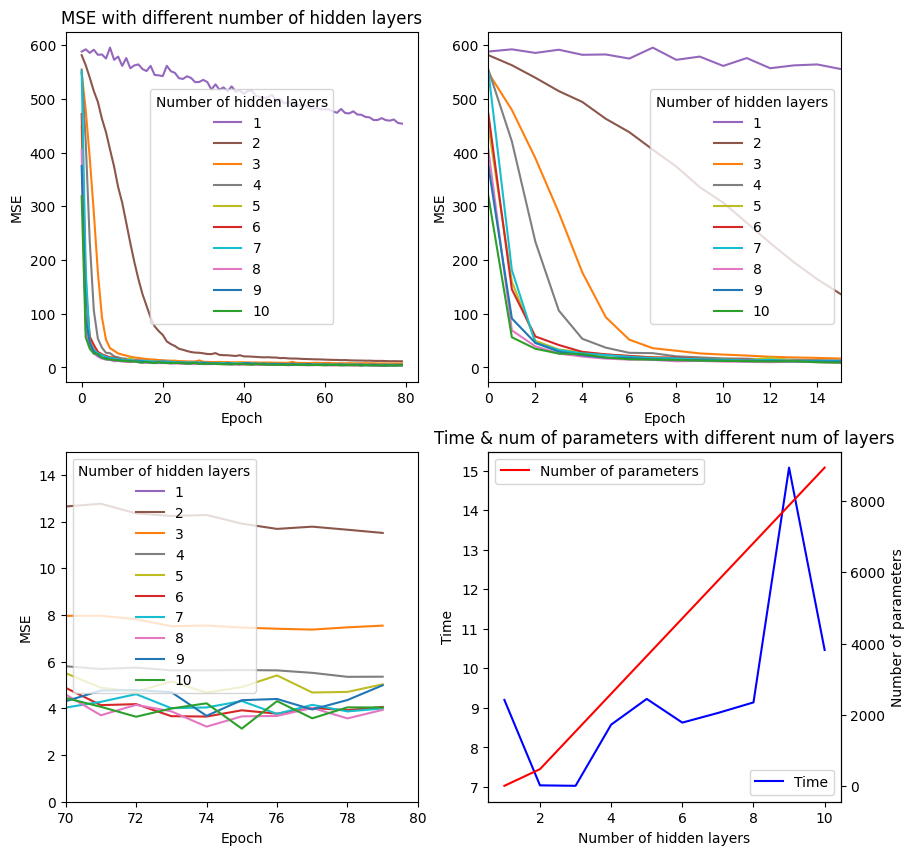

In [37]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(10, 10))

random_colors = np.random.choice(colors, size=10, replace=False)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_1.plot(line, color=color, label=layers)
ax_1.legend(title='Number of hidden layers')
ax_1.set_ylabel('MSE')
ax_1.set_xlabel('Epoch')
ax_1.set_title('MSE with different number of hidden layers')

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_2.plot(line, color=color, label=layers)
ax_2.legend(title='Number of hidden layers')
ax_2.set_ylabel('MSE')
ax_2.set_xlabel('Epoch')
ax_2.set_xlim(0, 15)

for line, color, layers in zip(result_train_history, random_colors, range(1,11)):
    ax_3.plot(line, color=color, label=layers)
ax_3.legend(title='Number of hidden layers', loc='upper left')
ax_3.set_ylabel('MSE')
ax_3.set_xlabel('Epoch')
ax_3.set_ylim(0, 15)
ax_3.set_xlim(70, 80)

ax_4.plot(range(1,11), result_times, 'b-')
ax_5 = ax_4.twinx()
ax_5.plot(range(1,11), result_params_num, 'r-')
ax_4.set_ylabel('Time')
ax_5.set_ylabel('Number of parameters')
ax_4.set_xlabel('Number of hidden layers')
ax_4.legend(['Time'], loc='lower right')
ax_5.legend(['Number of parameters'], loc='upper left')
ax_4.set_title('Time & num of parameters with different num of layers')

### 隱藏層層數對模型的影響

在每層隱藏層節點都是16個，隱藏層在1、2層時，收斂情況較差，尤其是1層無法收斂。
3層以上模型性能有叫明顯的改善，5層以後差異不大，但參數量會對執行時間造成影響。